# Car Price Prediction


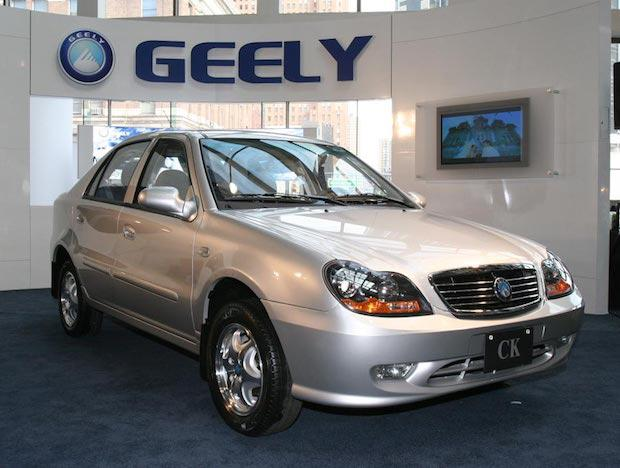

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')


# https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [7]:
cars.CarName.value_counts()

peugeot 504            6
toyota corolla         6
toyota corona          6
subaru dl              4
mazda 626              3
                      ..
chevrolet vega 2300    1
nissan dayz            1
jaguar xk              1
toyota cressida        1
nissan otti            1
Name: CarName, Length: 147, dtype: int64

In [8]:
"toyota corolla".split(' ')

['toyota', 'corolla']

In [9]:
"alfa-romero giulia".split(' ')

['alfa-romero', 'giulia']

In [10]:
"toyota corolla".split(' ')[0]
# "audi 5000s (diesel)".split(' ')[0]

'toyota'

In [11]:
cars.head(2)

car_ID  symboling              CarName fueltype aspiration doornumber  \
0       1          3   alfa-romero giulia      gas        std        two   
1       2          3  alfa-romero stelvio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0

### Step 2 : Data Cleaning and Preparation

In [12]:
# Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [13]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
len(cars.CompanyName.unique())

28

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [15]:
cars.CompanyName = cars.CompanyName.str.lower()
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
len(cars.CompanyName.unique())

22

In [18]:
cars.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [19]:
#Checking for duplicates
cars.loc[cars.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

In [20]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

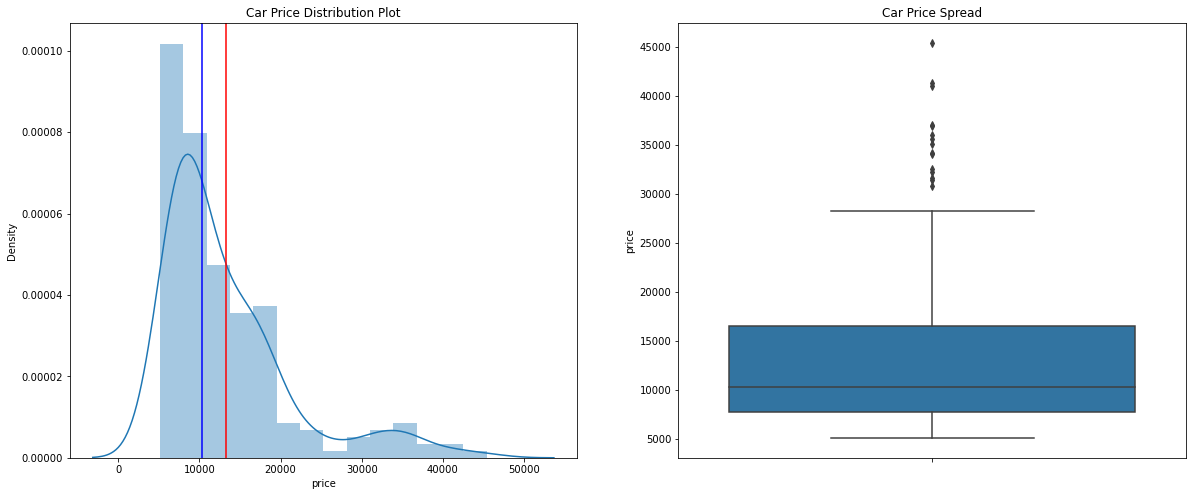

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)
plt.axvline(cars.price.mean(), color="r")
plt.axvline(cars.price.median(), color="b")

















plt.show()

In [22]:
print(cars.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [23]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#### Step 3.1 : Visualising Categorical Data

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

In [24]:
cars.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CompanyName, dtype: int64

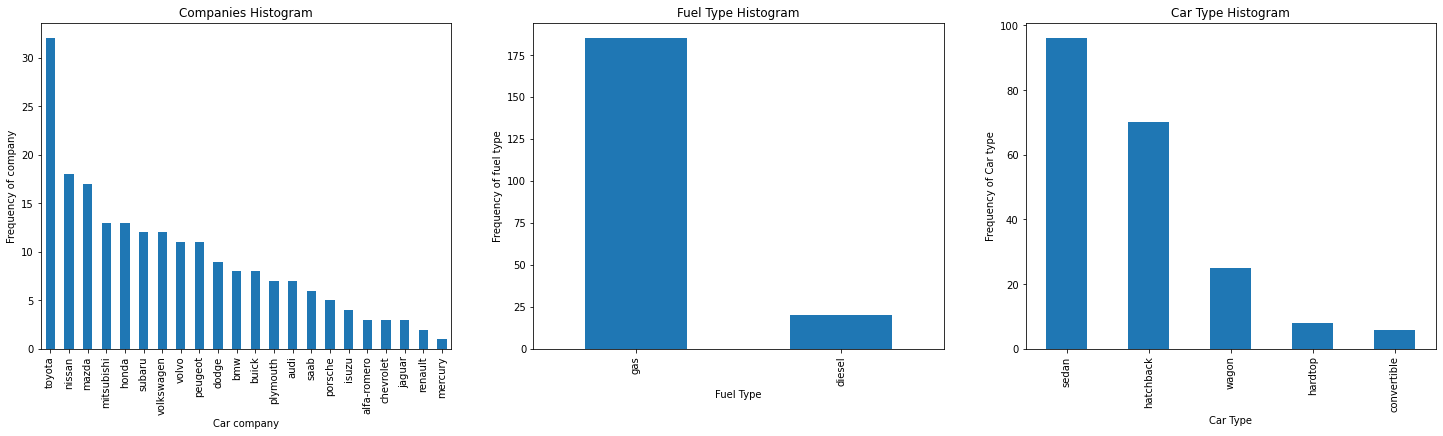

In [25]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### Inference :

1. `Toyota` seemed to be favored car company.
2. Number of `gas` fueled cars are more than `diesel`.
3. `sedan` is the top car type prefered.

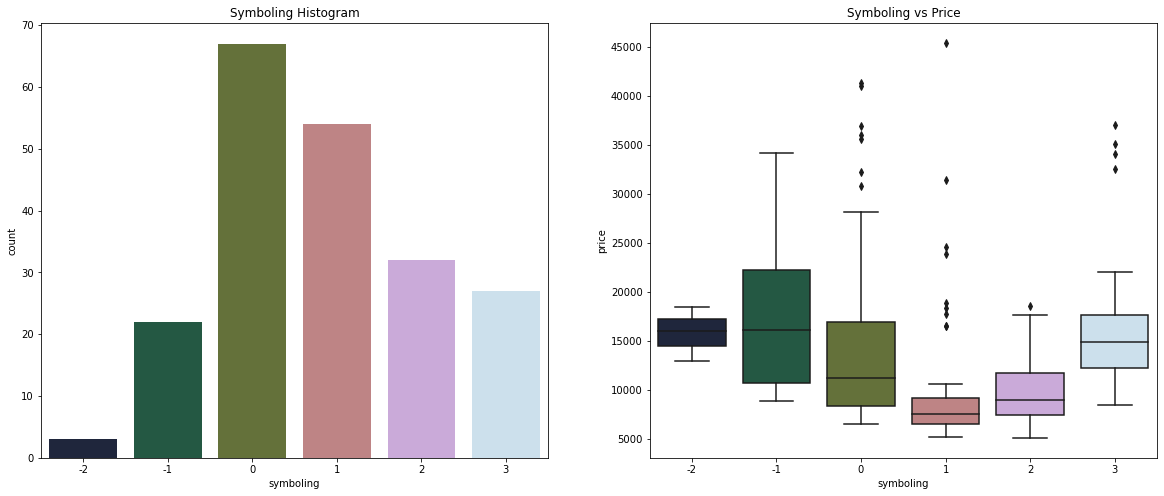

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

#### Inference :

1. It seems that the symboling with `0` and `1` values have high number of rows (i.e. They are most sold.)
2. The cars with `-1` symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with `3` value has the price range similar to `-2` value. There is a dip in price at symboling `1`.

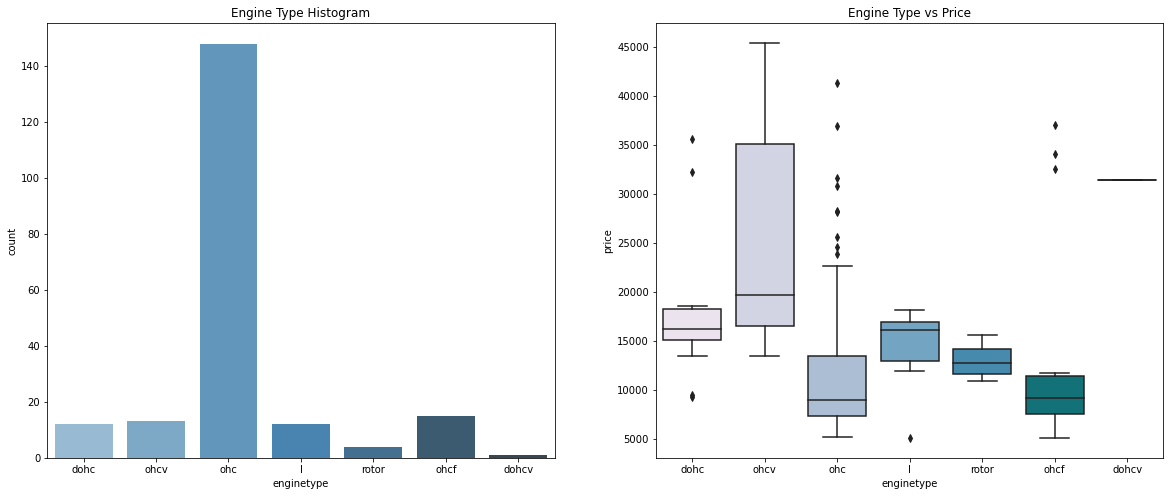

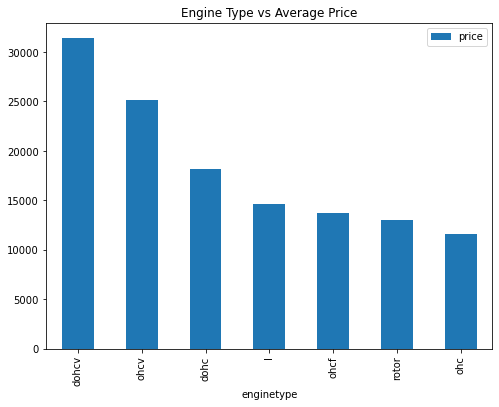

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


In [28]:
cars.groupby(['enginetype']).mean()[['price']].sort_values(by='price', ascending = False)

price
enginetype              
dohcv       31400.500000
ohcv        25098.384615
dohc        18116.416667
l           14627.583333
ohcf        13738.600000
rotor       13020.000000
ohc         11574.048426

#### Inference :

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

<Figure size 1800x432 with 0 Axes>

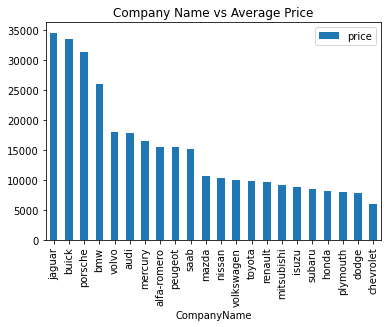

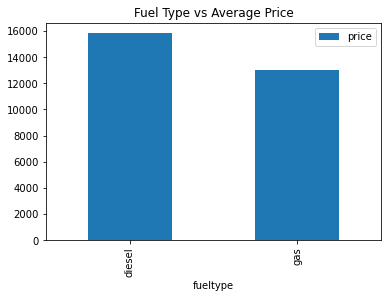

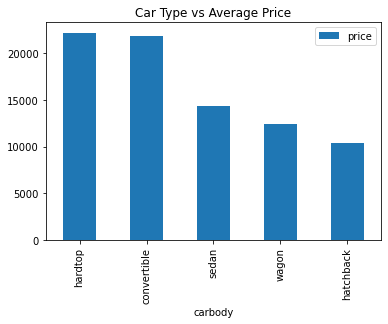

In [29]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Inference :

1. `Jaguar` and `Buick` seem to have highest average price.
2. `diesel` has higher average price than  gas.
3. `hardtop` and `convertible` have higher average price.

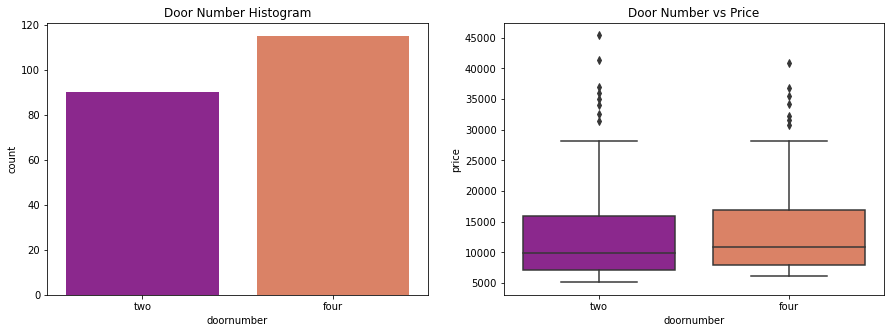

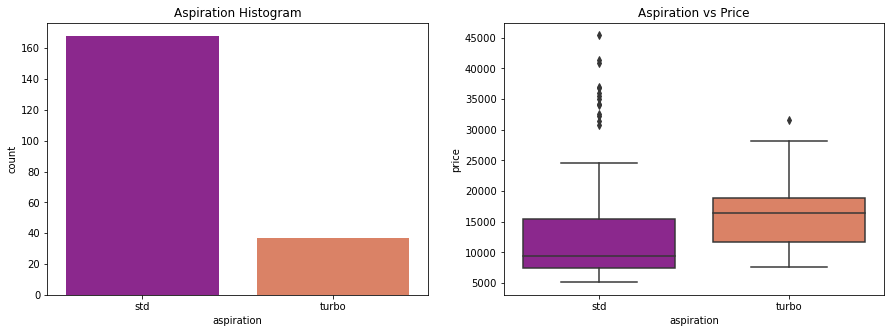

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


#### Inference :

1. `doornumber` variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

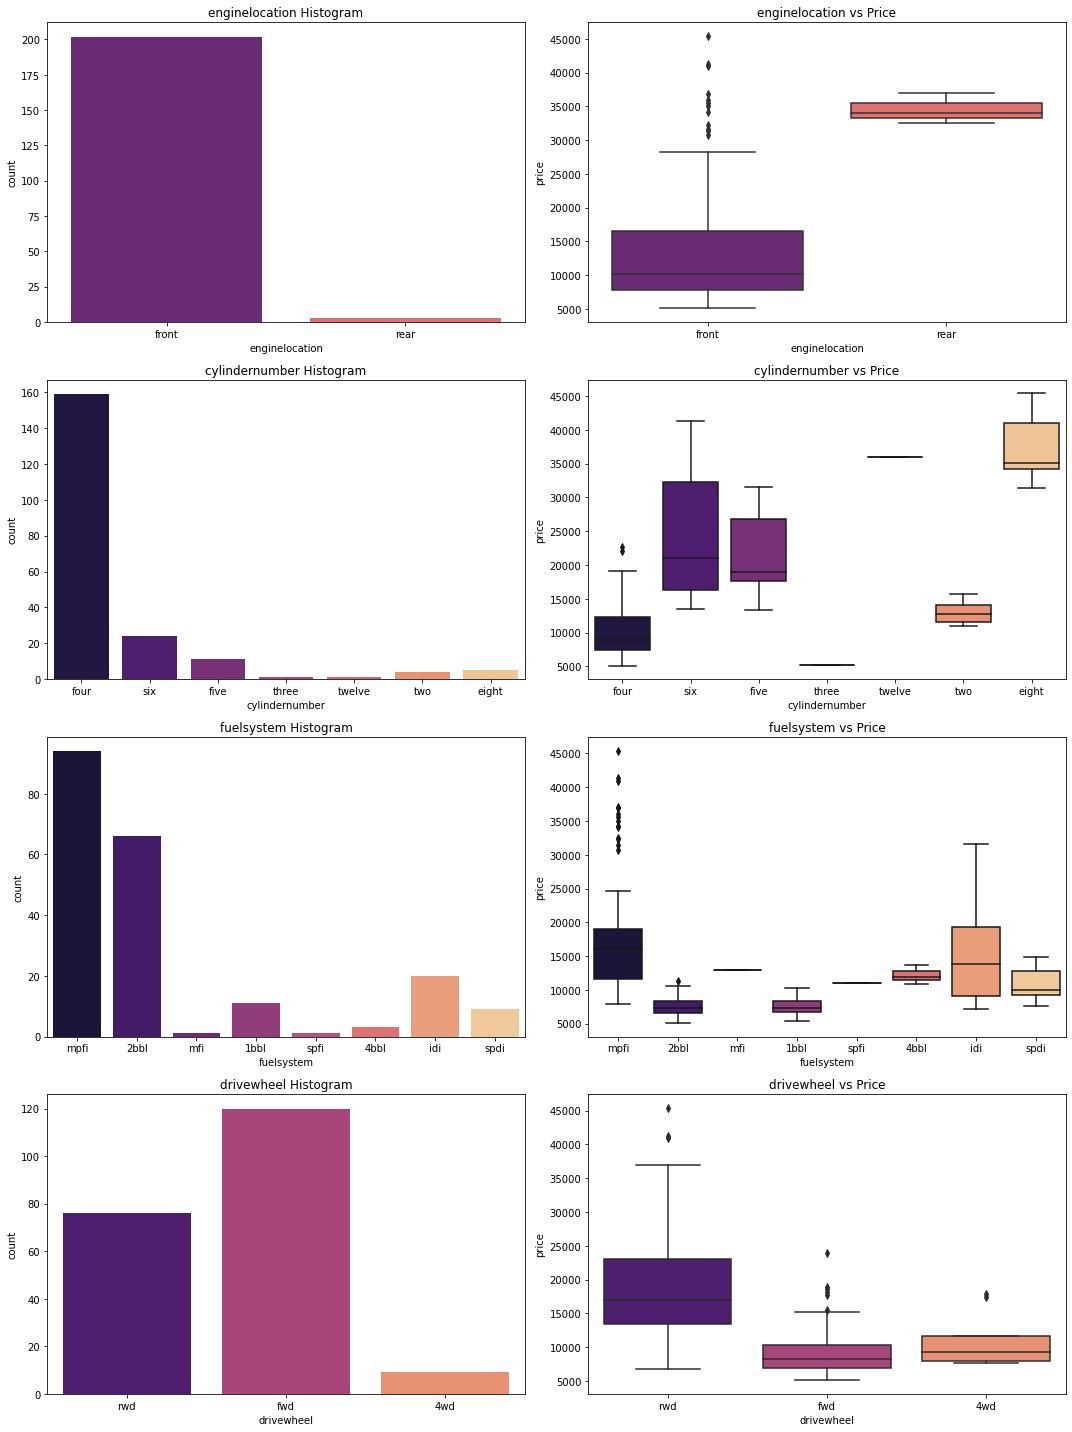

In [31]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

#### Inference :

1. Very few datapoints for `enginelocation` categories to make an inference.
2. Most common number of cylinders are `four`, `six` and `five`. Though `eight` cylinders have the highest price range.
3. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer `rwd` drivewheel.

#### Step 3.2 : Visualising numerical data

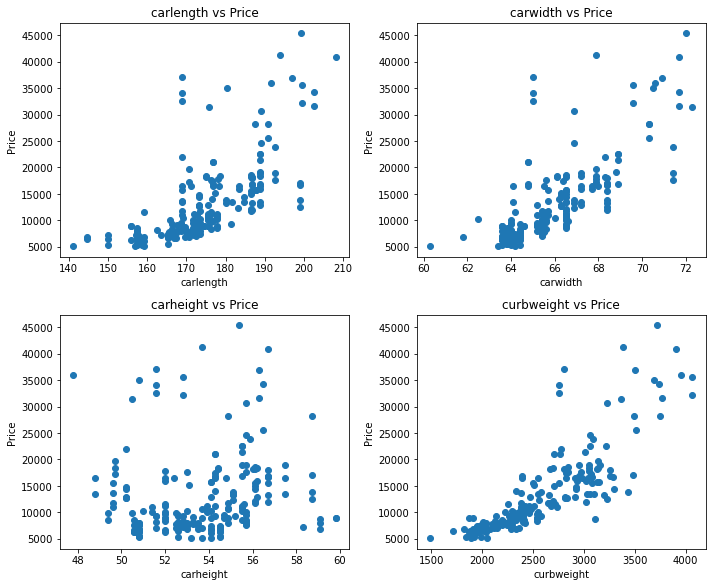

In [32]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

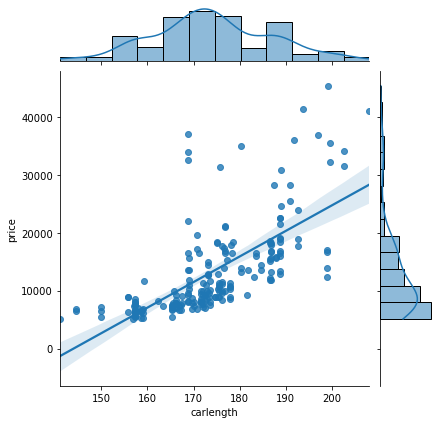

In [33]:
sns.jointplot(x= "carlength", y='price', data=cars, kind="reg")
plt.show()

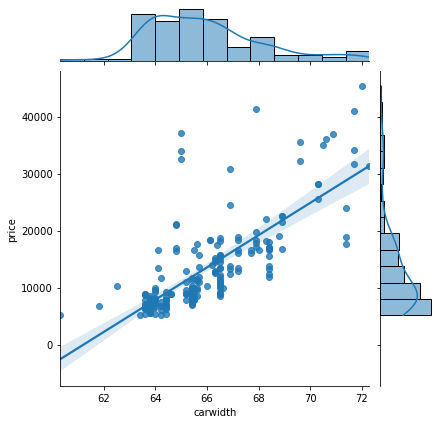

In [34]:
sns.jointplot(x= "carwidth", y='price', data=cars, kind="reg")
plt.show()

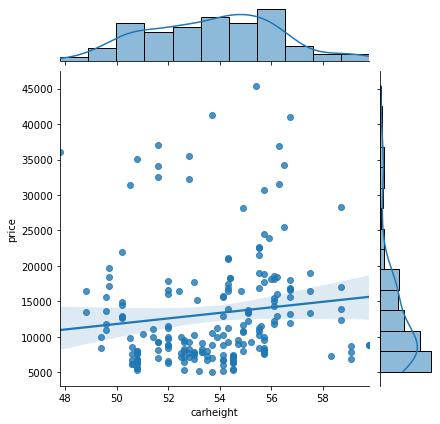

In [35]:
sns.jointplot(x= "carheight", y='price', data=cars, kind="reg")
plt.show()

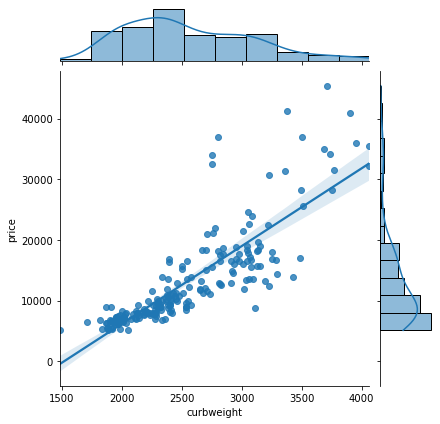

In [36]:
sns.jointplot(x= "curbweight", y='price', data=cars, kind="reg")
plt.show()

#### Inference :

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

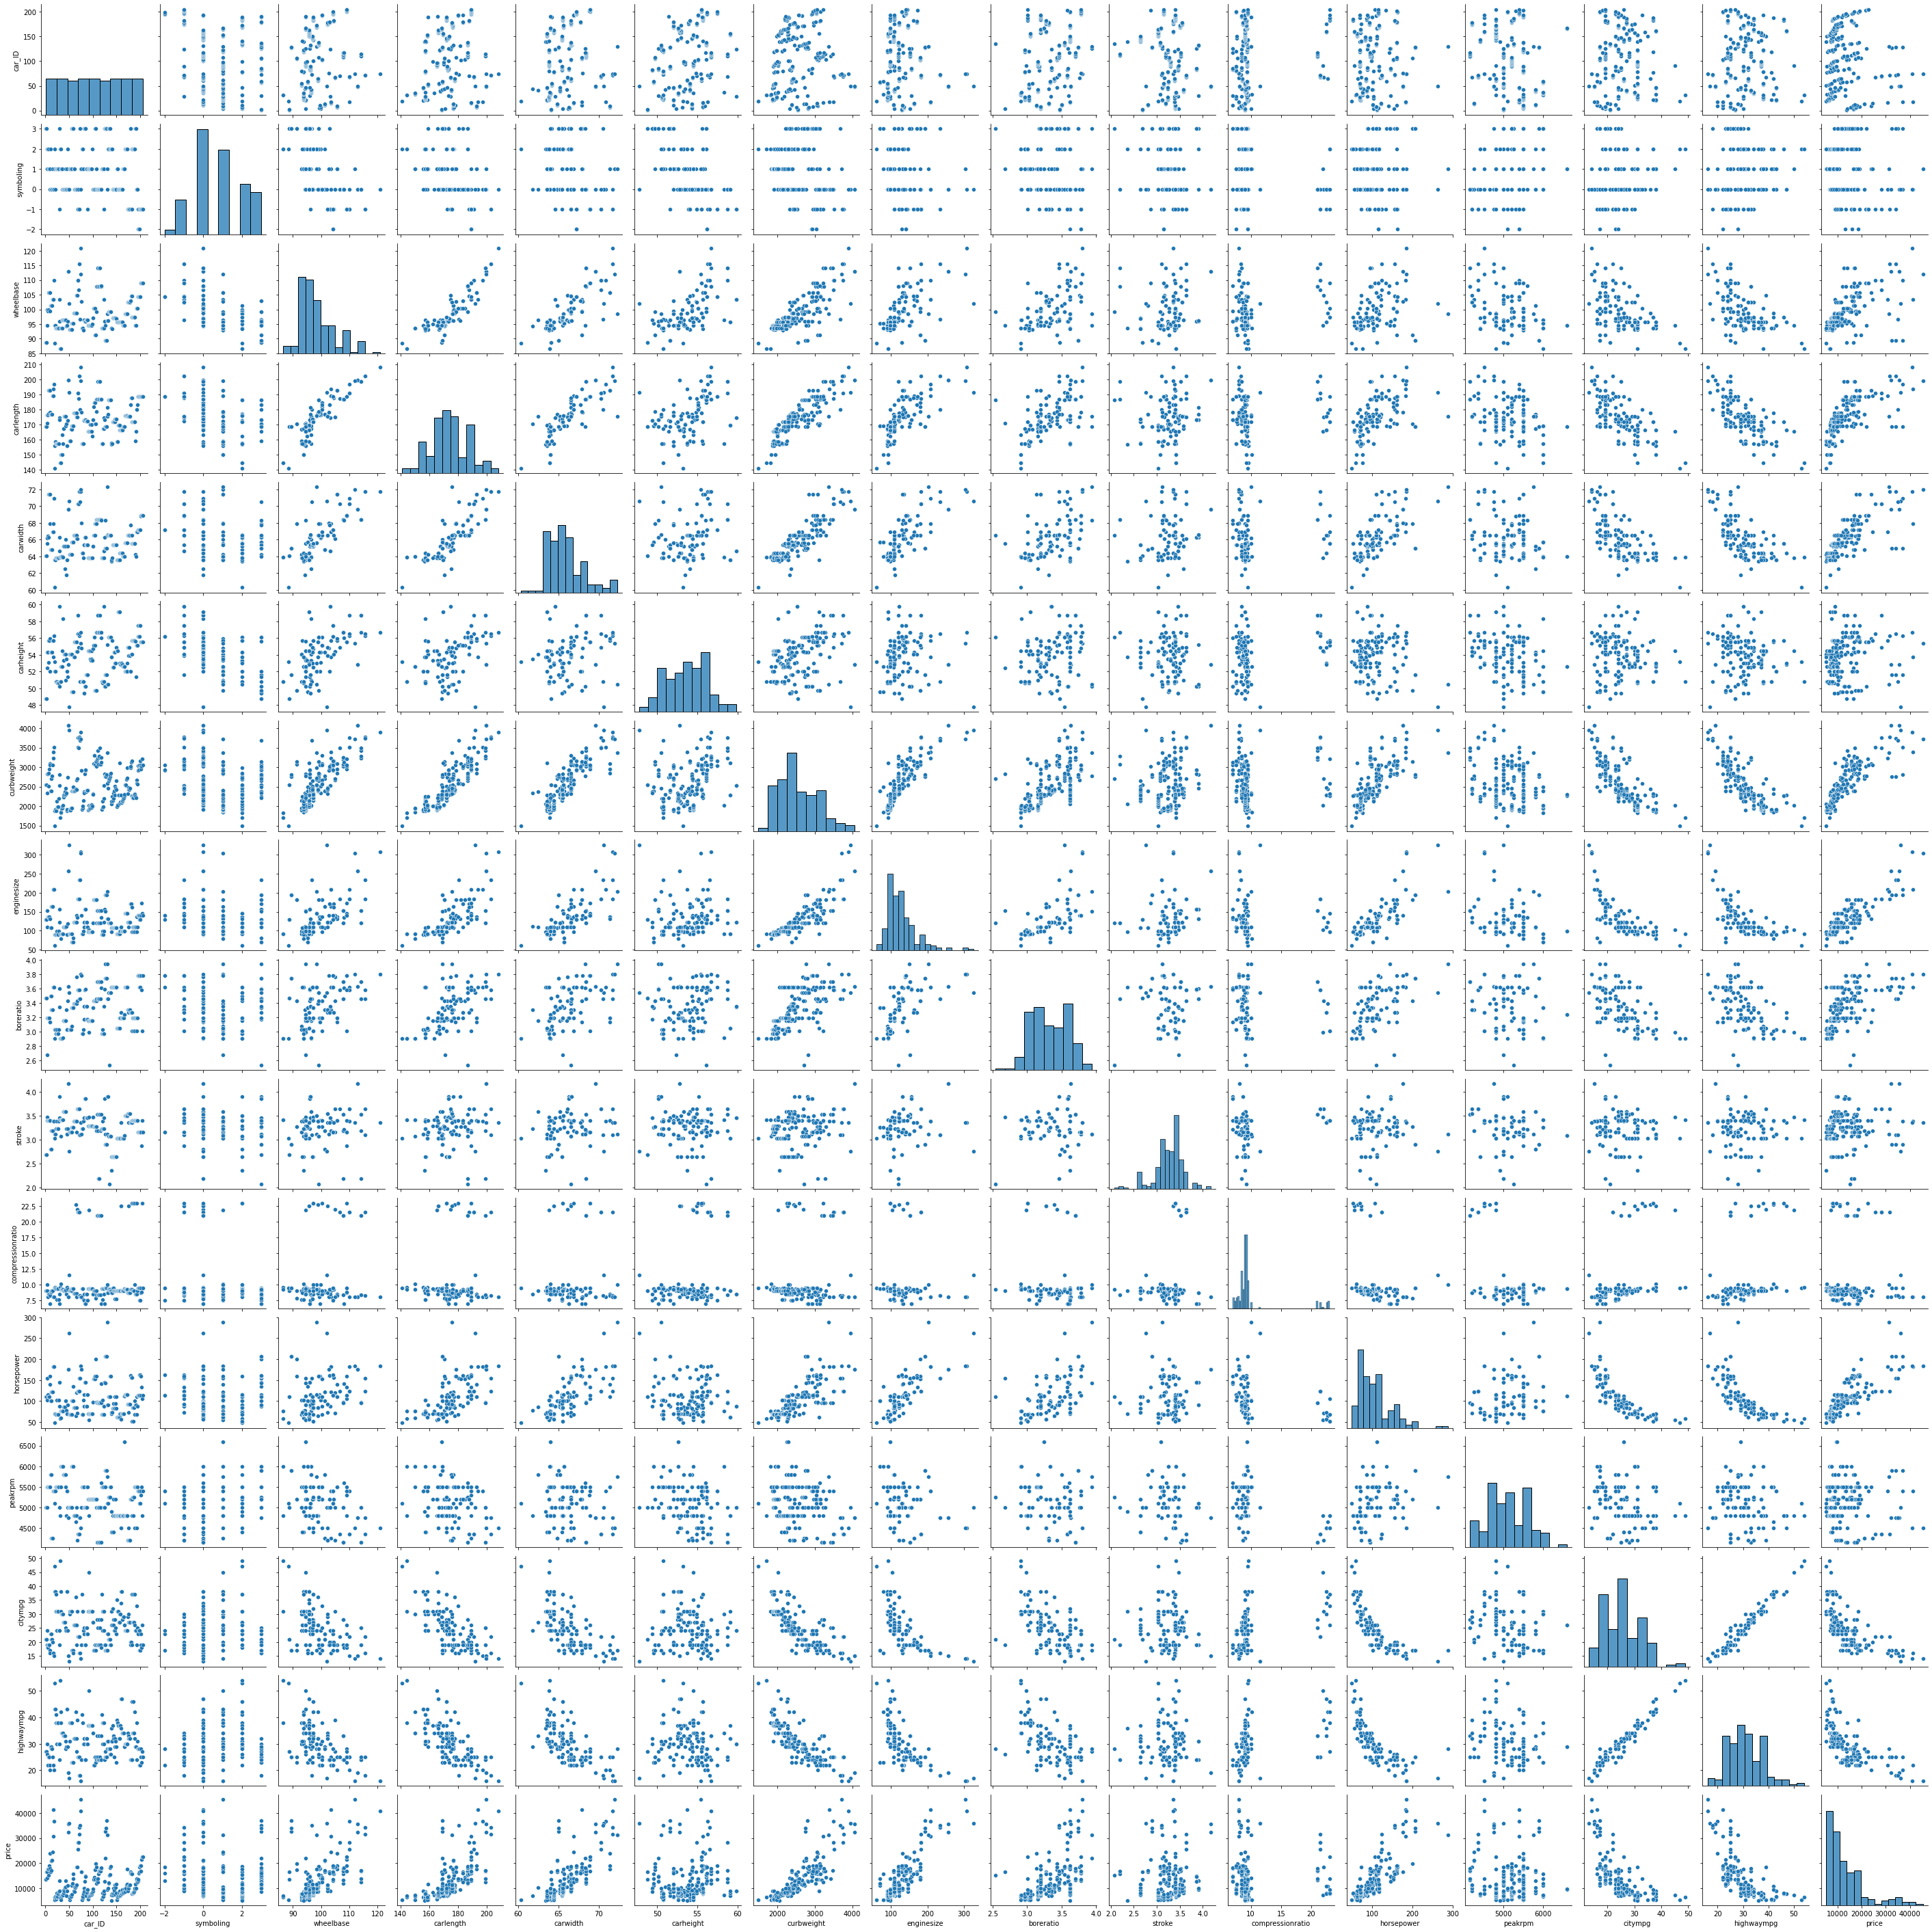

In [37]:
# Avoid Pairplot when there are too many columns
# Its difficult to interpret and time consuming as well
sns.pairplot(cars)
plt.show()

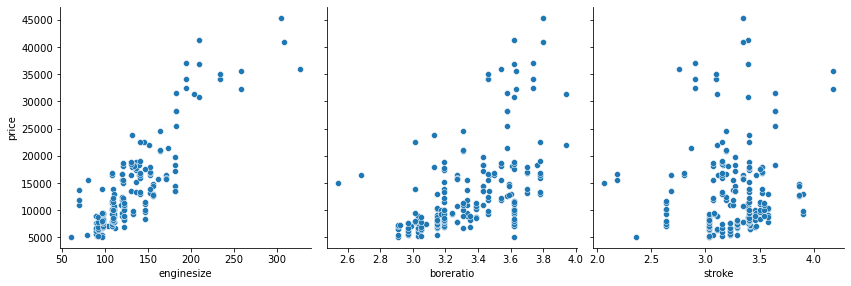

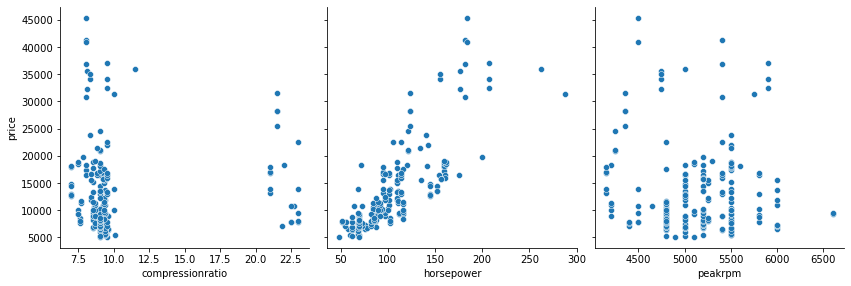

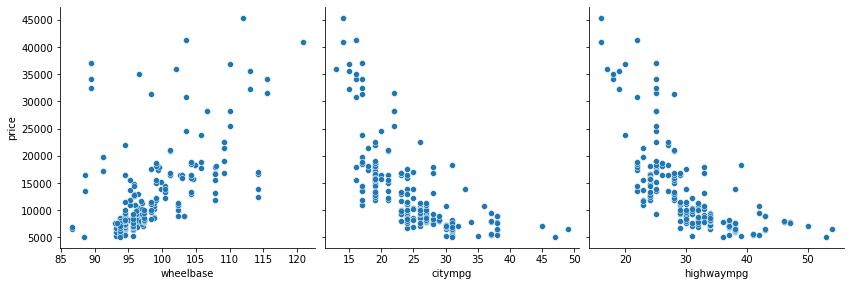

In [38]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

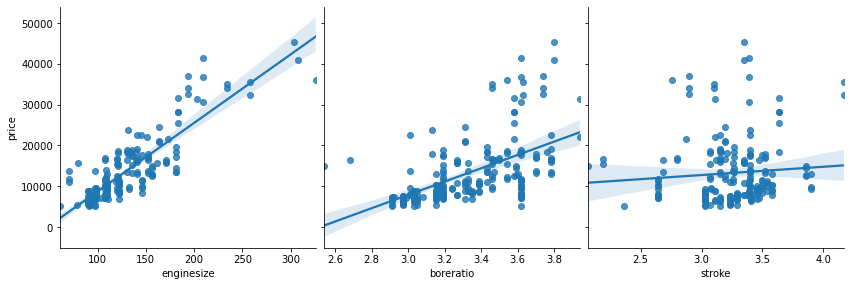

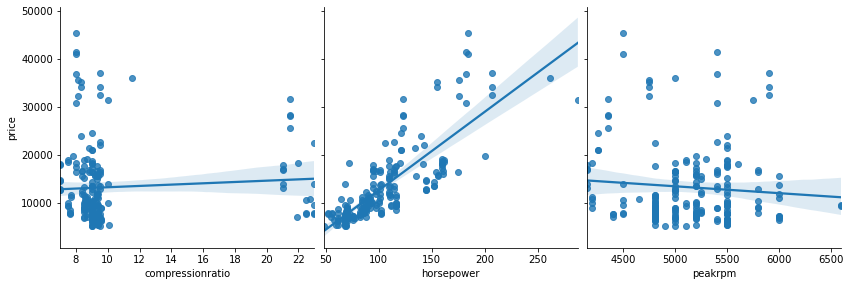

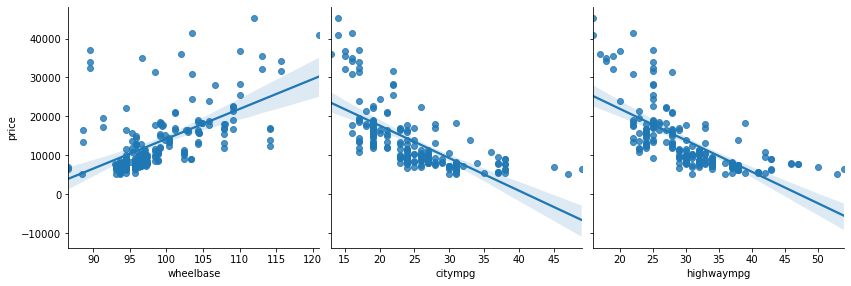

In [39]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='reg')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

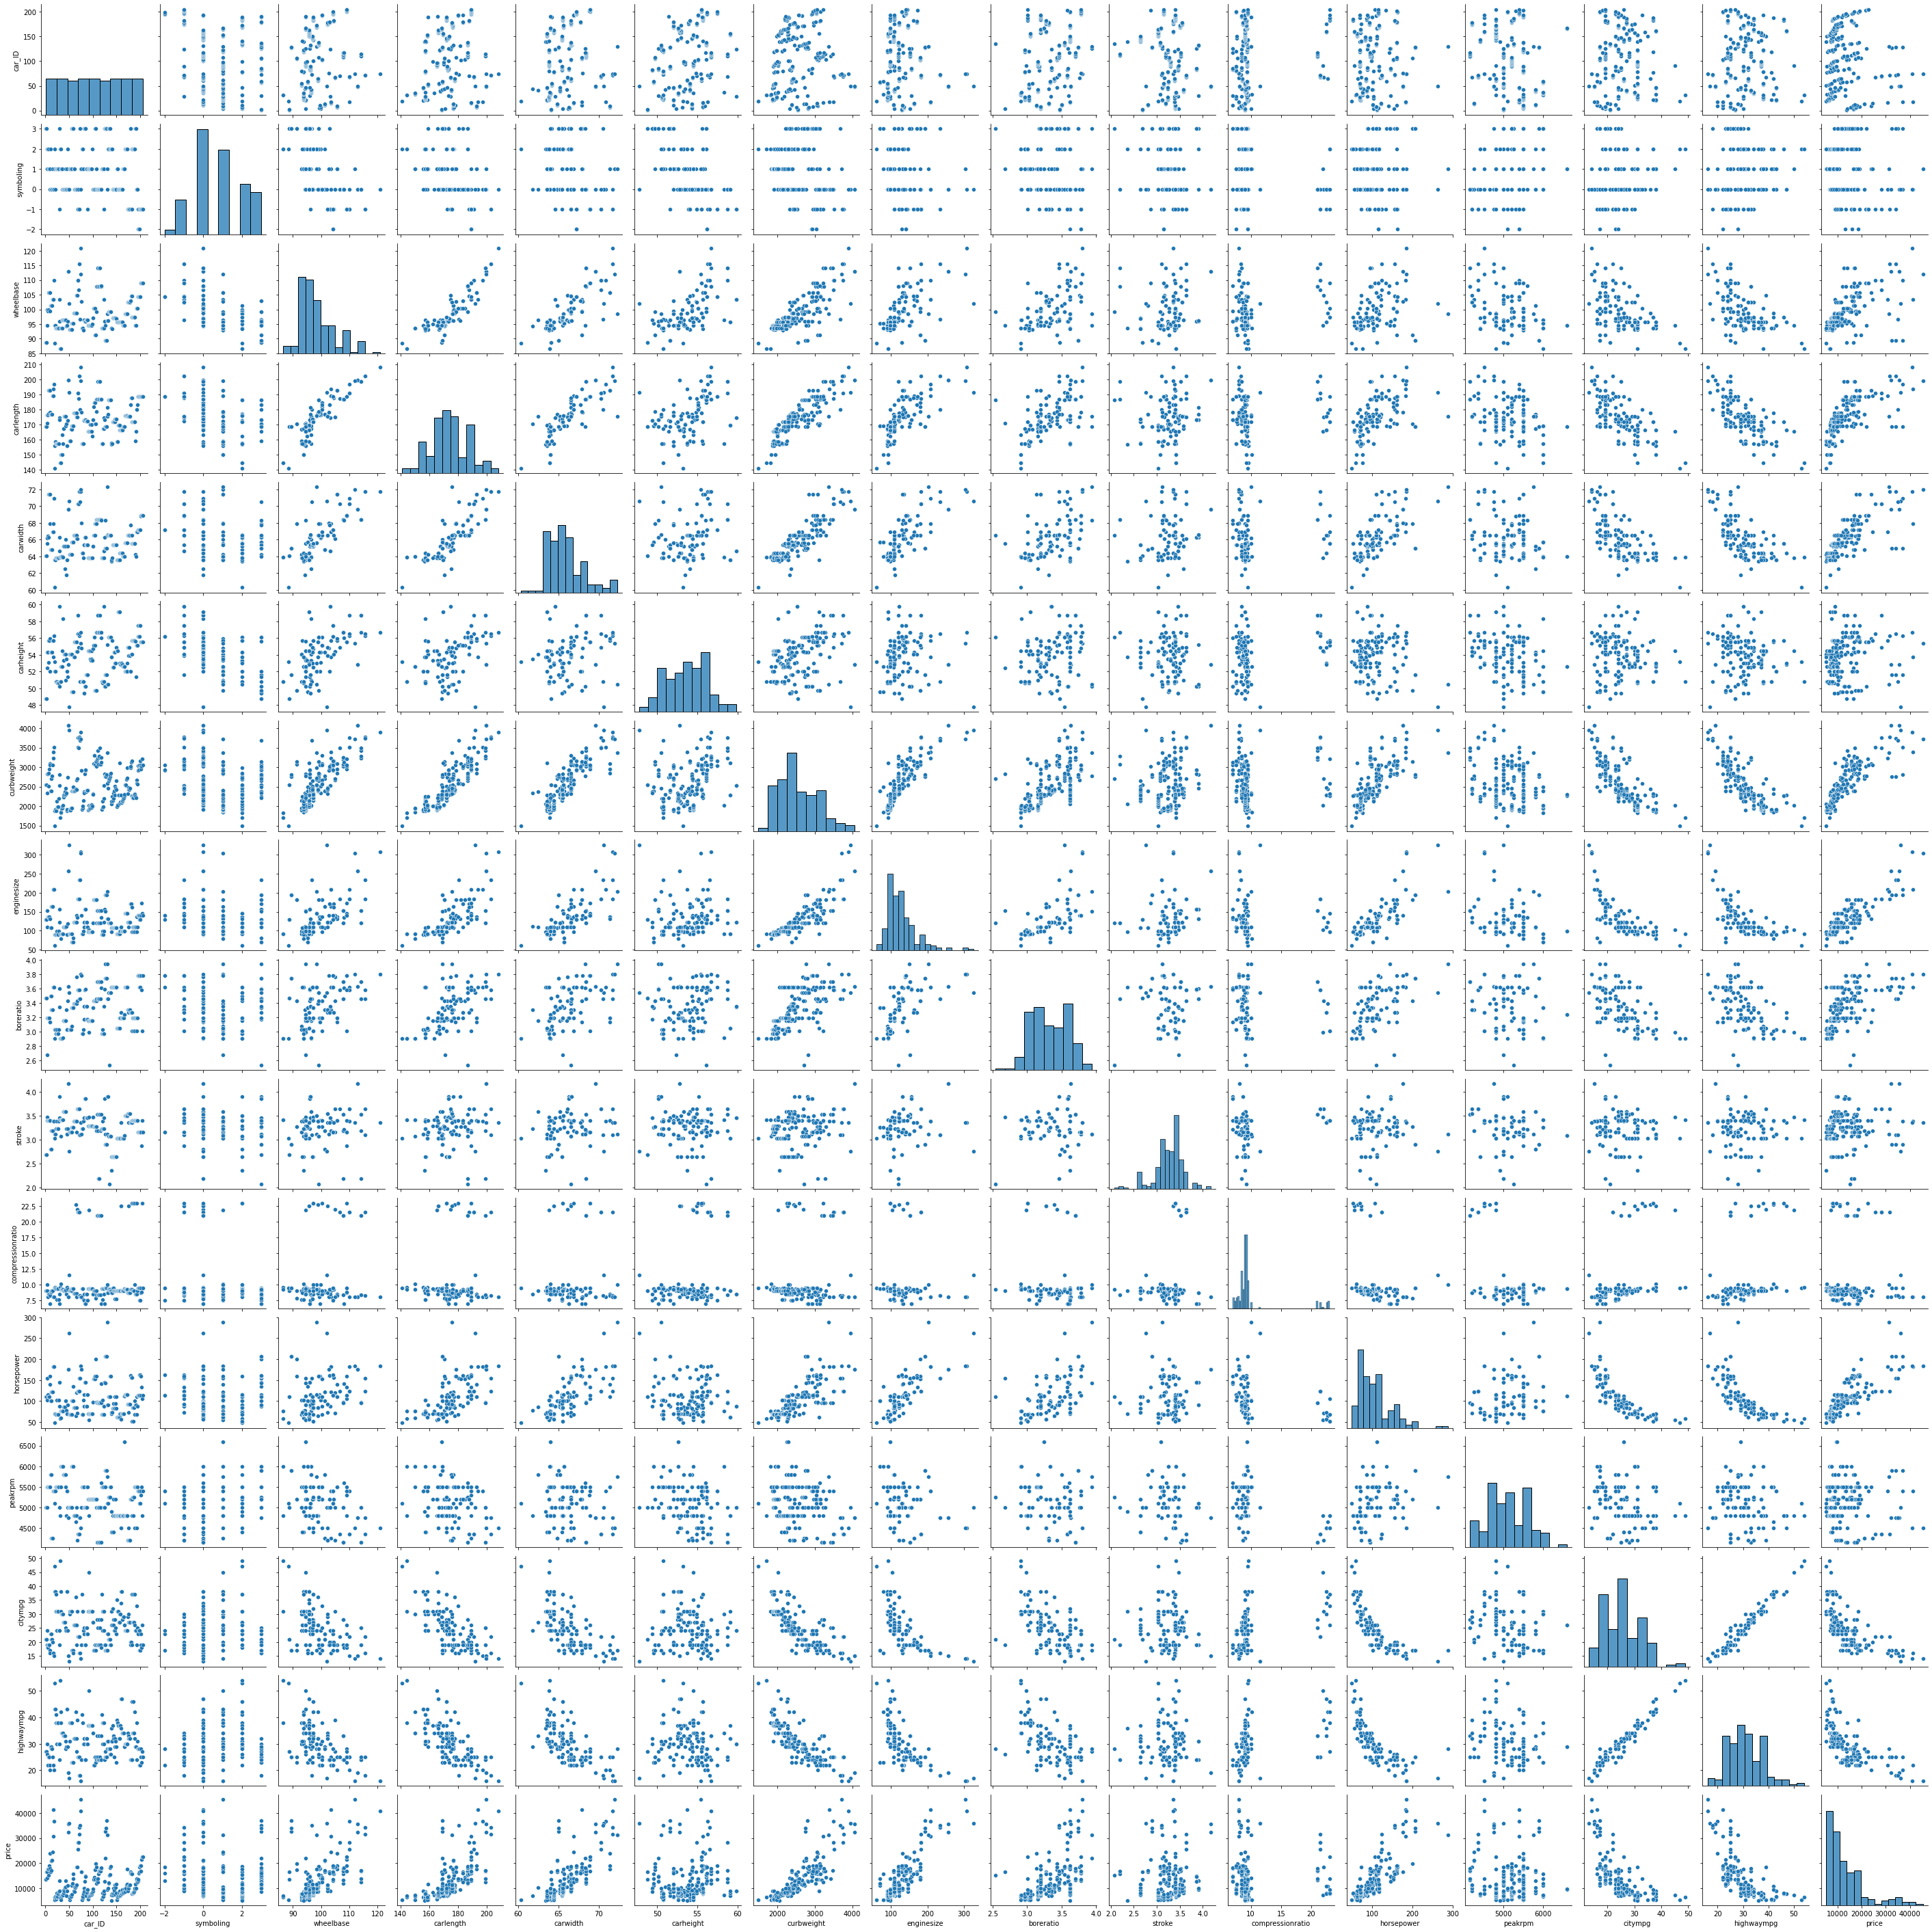

In [40]:
# Not Recommended
sns.pairplot(cars, kind='scatter')
plt.show()

#### Inference :

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
2. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

In [41]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.8411182684818456

In [42]:
np.corrcoef(cars['carlength'], cars['carwidth'])

array([[1.        , 0.84111827],
       [0.84111827, 1.        ]])

In [43]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### Step 4 : Deriving new features i.e. Feature Engineering

In [44]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  fueleconomy  
0  13495.0        23.70  
1  16500.0        23.70  
2  16500.0        22.15  
3  13950.0        26.70  
4  17450.0        19.80

In [45]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  \
count  205.000000   205.000000  205.000000  205.000000    205.000000   
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571   
std     39.544167   476.985643    6.542142    6.886443   7988.852332   
min     48.000000  4150.000000   13.000000   16.000000   5118.000000   
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000   
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000   
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000   
max    288.000000  6600.000000   49.000000   54.000000  45400.000000   

       fueleconomy  
count   205.000000  
mean     27.708780  
std       6.649183  
min      14.800000  
25%      21.950000  
50%      26.700000  
75%      31.800000  
max      51.250000

In [46]:
cars.price.dtype

dtype('float64')

## Binning the Car Companies based on avg prices of each Company.

In [47]:
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
temp.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  \
0    2.68               9.0         111     5000       21          27  13495   
1    2.68               9.0         111     5000       21          27  16500   
2    3.47               9.0         154     5000       19          26  16500   
3    3.40              10.0         102     5500       24          30  13950   
4    3.40               8.0         115     5500       18          22  17450   

   fueleconomy  
0        23.70  
1        23.70  
2        22.15  
3        26.70  
4        19.80

In [48]:
table = temp.groupby(['CompanyName'])['price'].mean()
table

CompanyName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [49]:
table.reset_index()

CompanyName         price
0   alfa-romero  15498.333333
1          audi  17859.142857
2           bmw  26118.750000
3         buick  33647.000000
4     chevrolet   6007.000000
5         dodge   7875.444444
6         honda   8184.692308
7         isuzu   8916.250000
8        jaguar  34600.000000
9         mazda  10652.882353
10      mercury  16503.000000
11   mitsubishi   9239.769231
12       nissan  10415.666667
13      peugeot  15489.090909
14     plymouth   7963.428571
15      porsche  31400.400000
16      renault   9595.000000
17         saab  15223.333333
18       subaru   8541.250000
19       toyota   9885.812500
20   volkswagen  10077.500000
21        volvo  18063.181818

In [50]:
temp.merge(table.reset_index(), how='left',on='CompanyName')

car_ID  symboling  CompanyName fueltype aspiration doornumber  \
0         1          3  alfa-romero      gas        std        two   
1         2          3  alfa-romero      gas        std        two   
2         3          1  alfa-romero      gas        std        two   
3         4          2         audi      gas        std       four   
4         5          2         audi      gas        std       four   
..      ...        ...          ...      ...        ...        ...   
200     201         -1        volvo      gas        std       four   
201     202         -1        volvo      gas      turbo       four   
202     203         -1        volvo      gas        std       four   
203     204         -1        volvo   diesel      turbo       four   
204     205         -1        volvo      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0    convertible        rwd          front       88.6      168.8      64.1   
1    convertible        rwd          front       88.6      168.8      64.1   
2      hatchback        rwd          front       94.5      171.2      65.5   
3          sedan        fwd          front       99.8      176.6      66.2   
4          sedan        4wd          front       99.4      176.6      66.4   
..           ...        ...            ...        ...        ...       ...   
200        sedan        rwd          front      109.1      188.8      68.9   
201        sedan        rwd          front      109.1      188.8      68.8   
202        sedan        rwd          front      109.1      188.8      68.9   
203        sedan        rwd          front      109.1      188.8      68.9   
204        sedan        rwd          front      109.1      188.8      68.9   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0         48.8        2548       dohc           four         130       mpfi   
1         48.8        2548       dohc           four         130       mpfi   
2         52.4        2823       ohcv            six         152       mpfi   
3         54.3        2337        ohc           four         109       mpfi   
4         54.3        2824        ohc           five         136       mpfi   
..         ...         ...        ...            ...         ...        ...   
200       55.5        2952        ohc           four         141       mpfi   
201       55.5        3049        ohc           four         141       mpfi   
202       55.5        3012       ohcv            six         173       mpfi   
203       55.5        3217        ohc            six         145        idi   
204       55.5        3062        ohc           four         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg  price_x  fueleconomy       price_y  
0            27    13495        23.70  15498.333333  
1            27    16500        23.70  15498.333333  
2            26    16500        22.15  15498.333333  
3            30    13950        26.70  17859.142857  
4            22    17450        19.80  17859.142857  
..          ...      ...          ...           ...  
200        

In [51]:
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  \
0    2.68               9.0         111     5000       21          27  13495   
1    2.68               9.0         111     5000       21          27  16500   
2    3.47               9.0         154     5000       19          26  16500   
3    3.40              10.0         102     5500       24          30  13950   
4    3.40               8.0         115     5500       18          22  17450   

   fueleconomy carsrange  
0        23.70    Medium  
1        23.70    Medium  
2        22.15    Medium  
3        26.70    Medium  
4        19.80    Medium

In [52]:
cars.carsrange.value_counts()

Budget     95
Medium     86
Highend    24
Name: carsrange, dtype: int64

In [53]:
cars.carsrange.value_counts(normalize=True)*100

Budget     46.341463
Medium     41.951220
Highend    11.707317
Name: carsrange, dtype: float64

### Step 5 : Bivariate Analysis

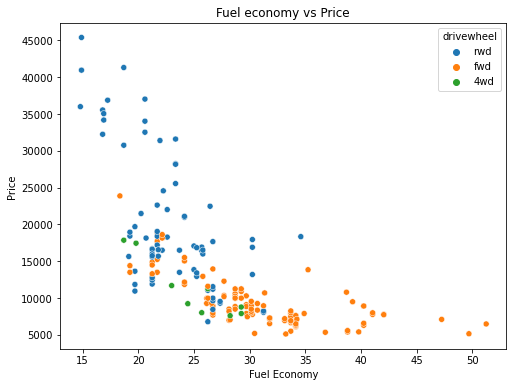

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

In [55]:
cars['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

#### Inference :

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

In [56]:
cars.groupby(['fuelsystem','drivewheel','carsrange']).mean()[['price']]

price
fuelsystem drivewheel carsrange              
1bbl       4wd        Budget              NaN
                      Medium              NaN
                      Highend             NaN
           fwd        Budget      7555.545455
                      Medium              NaN
...                                       ...
spfi       fwd        Medium              NaN
                      Highend             NaN
           rwd        Budget     11048.000000
                      Medium              NaN
                      Highend             NaN

[72 rows x 1 columns]

In [57]:
cars.groupby(['fuelsystem','drivewheel','carsrange']).mean()[['price']].unstack()

price                       
carsrange                    Budget        Medium  Highend
fuelsystem drivewheel                                     
1bbl       4wd                  NaN           NaN      NaN
           fwd          7555.545455           NaN      NaN
           rwd                  NaN           NaN      NaN
2bbl       4wd          8305.000000           NaN      NaN
           fwd          7126.000000   7870.904762      NaN
           rwd          7693.666667           NaN      NaN
4bbl       4wd                  NaN           NaN      NaN
           fwd                  NaN           NaN      NaN
           rwd                  NaN  12145.000000      NaN
idi        4wd                  NaN           NaN      NaN
           fwd          8794.666667   9500.666667      NaN
           rwd                  NaN  17114.142857  28394.0
mfi        4wd                  NaN           NaN      NaN
           fwd         12964.000000           NaN      NaN
           rwd                  NaN           NaN      NaN
mpfi       4wd         11476.500000  17654.500000      NaN
           fwd          9990.000000  13830.090909      NaN
           rwd         12610.500000  16793.600000  31267.6
spdi       4wd                  NaN           NaN      NaN
           fwd         10768.750000           NaN      NaN
           rwd         12764.000000           NaN      NaN
spfi       4wd                  NaN           NaN      NaN
           fwd                  NaN           NaN      NaN
           rwd         11048.000000           NaN      NaN

<Figure size 1800x432 with 0 Axes>

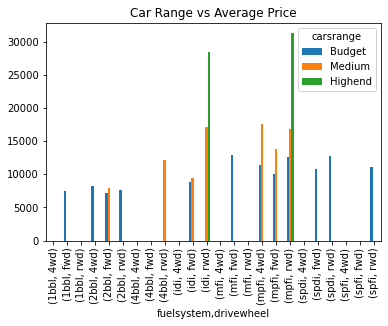

In [58]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Inference :

1. High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.

### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [59]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495      gas        std  convertible        rwd       88.6        2548   
1  16500      gas        std  convertible        rwd       88.6        2548   
2  16500      gas        std    hatchback        rwd       94.5        2823   
3  13950      gas        std        sedan        fwd       99.8        2337   
4  17450      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  fueleconomy  \
0       dohc           four         130       3.47         111        23.70   
1       dohc           four         130       3.47         111        23.70   
2       ohcv            six         152       2.68         154        22.15   
3        ohc           four         109       3.19         102        26.70   
4        ohc           five         136       3.19         115        19.80   

   carlength  carwidth carsrange  
0      168.8      64.1    Medium  
1      168.8      64.1    Medium  
2      171.2      65.5    Medium  
3      176.6      66.2    Medium  
4      176.6      66.4    Medium

In [60]:
len(cars_lr.columns)

16

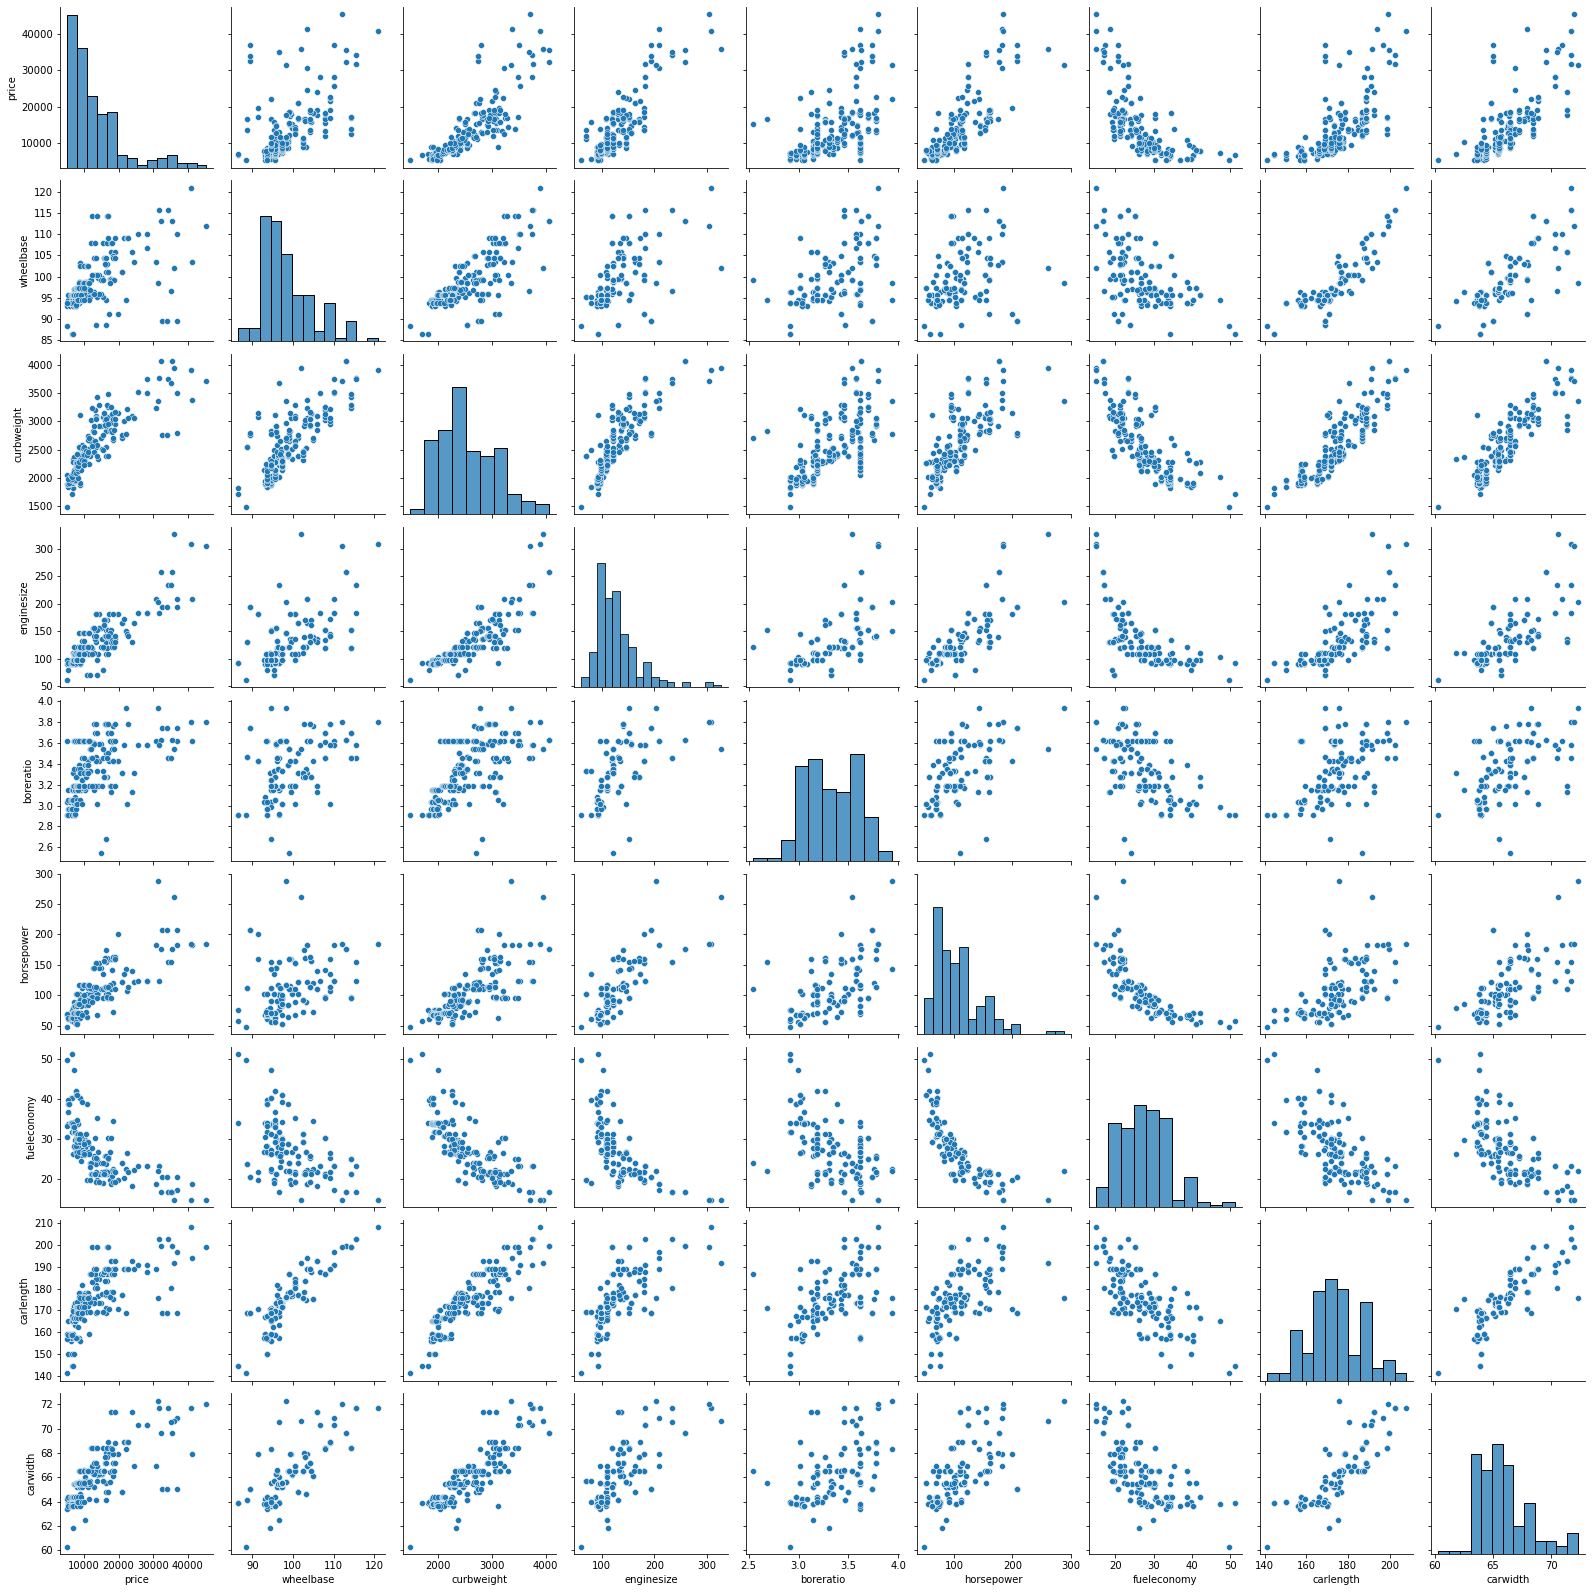

In [61]:
sns.pairplot(cars_lr)
plt.show()

### Step 6 : Dummy Variables / Dummification / One Hot Encoding

https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

In [65]:
cars_lr.select_dtypes(["object"]).head()

fueltype aspiration      carbody drivewheel enginetype cylindernumber
0      gas        std  convertible        rwd       dohc           four
1      gas        std  convertible        rwd       dohc           four
2      gas        std    hatchback        rwd       ohcv            six
3      gas        std        sedan        fwd        ohc           four
4      gas        std        sedan        4wd        ohc           five

In [71]:
for c in cars_lr.select_dtypes(["object",'category']).columns:
    print(cars_lr[c].value_counts())
    print("="*70)

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
Budget     95
Medium     86
Highend    24
Name: carsrange, dtype: int64


In [72]:
cat_cols = list(cars_lr.select_dtypes(["object",'category']).columns)
cat_cols

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'carsrange']

In [73]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           205 non-null    int64   
 1   fueltype        205 non-null    object  
 2   aspiration      205 non-null    object  
 3   carbody         205 non-null    object  
 4   drivewheel      205 non-null    object  
 5   wheelbase       205 non-null    float64 
 6   curbweight      205 non-null    int64   
 7   enginetype      205 non-null    object  
 8   cylindernumber  205 non-null    object  
 9   enginesize      205 non-null    int64   
 10  boreratio       205 non-null    float64 
 11  horsepower      205 non-null    int64   
 12  fueleconomy     205 non-null    float64 
 13  carlength       205 non-null    float64 
 14  carwidth        205 non-null    float64 
 15  carsrange       205 non-null    category
dtypes: category(1), float64(5), int64(4), object(6)
memory usage: 

## Dummification / One Hot Encoding

In [75]:
cars_lr = pd.get_dummies(cars_lr, columns=cat_cols, drop_first=True)
cars_lr.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  13495       88.6        2548         130       3.47         111   
1  16500       88.6        2548         130       3.47         111   
2  16500       94.5        2823         152       2.68         154   
3  13950       99.8        2337         109       3.19         102   
4  17450       99.4        2824         136       3.19         115   

   fueleconomy  carlength  carwidth  fueltype_gas  aspiration_turbo  \
0        23.70      168.8      64.1             1                 0   
1        23.70      168.8      64.1             1                 0   
2        22.15      171.2      65.5             1                 0   
3        26.70      176.6      66.2             1                 0   
4        19.80      176.6      66.4             1                 0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   
1                0                  0              0              0   
2                0                  1              0              0   
3                0                  0              1              0   
4                0                  0              1              0   

   drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
0               0               1                 0             0   
1               0               1                 0             0   
2               0               1                 0             0   
3               1               0                 0             0   
4               0               0                 0             0   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
0               0                0                0                 0   
1               0                0                0                 0   
2               0                0                1                 0   
3               1                0                0                 0   
4               1                0                0                 0   

   cylindernumber_five  cylindernumber_four  cylindernumber_six  \
0                    0                    1                   0   
1                    0                    1                   0   
2                    0                    0                   1   
3                    0                    1                   0   
4                    1                    0                   0   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   carsrange_Medium  carsrange_Highend  
0                 1                  0  
1                 1                  0  
2                 1                  0  
3                 1                  0  
4                 1                  0

In [76]:
cars_lr.fueltype_gas.value_counts()

1    185
0     20
Name: fueltype_gas, dtype: int64

In [ ]:
# # https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

# ALTERNATIVE WAY:
# # Defining the map function
# def dummies(x,df):
#     temp = pd.get_dummies(df[x], drop_first = True)
#     df = pd.concat([df, temp], axis = 1)
#     df.drop([x], axis = 1, inplace = True)
#     return df
# # Applying the function to the cars_lr

# cars_lr = dummies('fueltype',cars_lr)
# cars_lr = dummies('aspiration',cars_lr)
# cars_lr = dummies('carbody',cars_lr)
# cars_lr = dummies('drivewheel',cars_lr)
# cars_lr = dummies('enginetype',cars_lr)
# cars_lr = dummies('cylindernumber',cars_lr)
# cars_lr = dummies('carsrange',cars_lr)

In [ ]:
cars_lr.head()

In [77]:
cars_lr.shape

(205, 31)

### Step 7 : Train-Test Split and feature scaling

In [78]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [80]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122  0.068818   0.244828    0.272692    0.139623   0.230159    0.083333   
125  0.466890   0.272414    0.500388    0.339623   1.000000    0.395833   
166  0.122110   0.272414    0.314973    0.139623   0.444444    0.266667   
1    0.314446   0.068966    0.411171    0.260377   0.626984    0.262500   
199  0.382131   0.610345    0.647401    0.260377   0.746032    0.475000   

     fueleconomy  carlength  carwidth  fueltype_gas  aspiration_turbo  \
122     0.530864   0.426016  0.291667             1                 0   
125     0.213992   0.452033  0.666667             1                 0   
166     0.344307   0.448780  0.308333             1                 0   
1       0.244170   0.450407  0.316667             1                 0   
199     0.122085   0.775610  0.575000             1                 1   

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
122                0                  0              1              0   
125                0                  1              0              0   
166                0                  1              0              0   
1                  0                  0              0              0   
199                0                  0              0              1   

     drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
122               1               0                 0             0   
125               0               1                 0             0   
166               0               1                 0             0   
1                 0               1                 0             0   
199               0               1                 0             0   

     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
122               1                0                0                 0   
125               1                0                0                 0   
166               0                0                0                 0   
1                 0                0                0                 0   
199               1                0                0                 0   

     cylindernumber_five  cylindernumber_four  cylindernumber_six  \
122                    0                    1                   0   
125                    0                    1                   0   
166                    0                    1                   0   
1                      0                    1                   0   
199                    0                    1                   0   

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
122                     0                      0                   0   
125                     0                      0                   0   
166                     0                      0                   0   
1                       0                      0                   0   
199                     0                      0                   0   

     carsrange_Medium  carsrange_Highend  
122                 0                  0  
125                 0                  1  
166                 0                  0  
1                   1                  0  
199                 1                  0

In [81]:
df_train.describe()

price   wheelbase  curbweight  enginesize   boreratio  horsepower  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.219309    0.411141    0.407878    0.241351    0.497946    0.227302   
std      0.215682    0.205581    0.211269    0.154619    0.207140    0.165511   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.067298    0.272414    0.245539    0.135849    0.305556    0.091667   
50%      0.140343    0.341379    0.355702    0.184906    0.500000    0.191667   
75%      0.313479    0.503448    0.559542    0.301887    0.682540    0.283333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       fueleconomy   carlength    carwidth  fueltype_gas  aspiration_turbo  \
count   143.000000  143.000000  143.000000    143.000000        143.000000   
mean      0.358265    0.525476    0.461655      0.909091          0.181818   
std       0.185980    0.204848    0.184517      0.288490          0.387050   
min       0.000000    0.000000    0.000000      0.000000          0.000000   
25%       0.198903    0.399187    0.304167      1.000000          0.000000   
50%       0.344307    0.502439    0.425000      1.000000          0.000000   
75%       0.512346    0.669919    0.550000      1.000000          0.000000   
max       1.000000    1.000000    1.000000      1.000000          1.000000   

       carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
count       143.000000         143.000000     143.000000     143.000000   
mean          0.020979           0.342657       0.475524       0.132867   
std           0.143818           0.476266       0.501156       0.340624   
min           0.000000           0.000000       0.000000       0.000000   
25%           0.000000           0.000000       0.000000       0.000000   
50%           0.000000           0.000000       0.000000       0.000000   
75%           0.000000           1.000000       1.000000       0.000000   
max           1.000000           1.000000       1.000000       1.000000   

       drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
count      143.000000      143.000000        143.000000    143.000000   
mean         0.594406        0.349650          0.006993      0.062937   
std          0.492733        0.478536          0.083624      0.243703   
min          0.000000        0.000000          0.000000      0.000000   
25%          0.000000        0.000000          0.000000      0.000000   
50%          1.000000        0.000000          0.000000      0.000000   
75%          1.000000        1.000000          0.000000      0.000000   
max          1.000000        1.000000          1.000000      1.000000   

       enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
count      143.000000       143.000000       143.000000        143.000000   
mean         0.685315         0.083916         0.062937          0.027972   
std          0.466023         0.278236         0.243703          0.165472   
min          0.000000         0.000000         0.000000          0.000000   
25%          0.000000         0.000000         0.000000          0.000000   
50%          1.000000         0.000000         0.000000          0.000000   
75%          1.000000         0.000000         0.000000          0.000000   
max          1.000000         1.000000         1.000000          1.000000   

       cylindernumber_five  cylindernumber_four  cylindernumber_six  \
count           143.000000           143.000000          143.000000   
mean              0.062937             0.741259            0.132867   
std               0.243703             0.439483            0.340624   
min               0.000000             0.000000            0.000000   
25%               0.000000             0.000000            0.000000   
50%               0.000000             1.000000            0.000000   
75%               0.000000             1.000000       

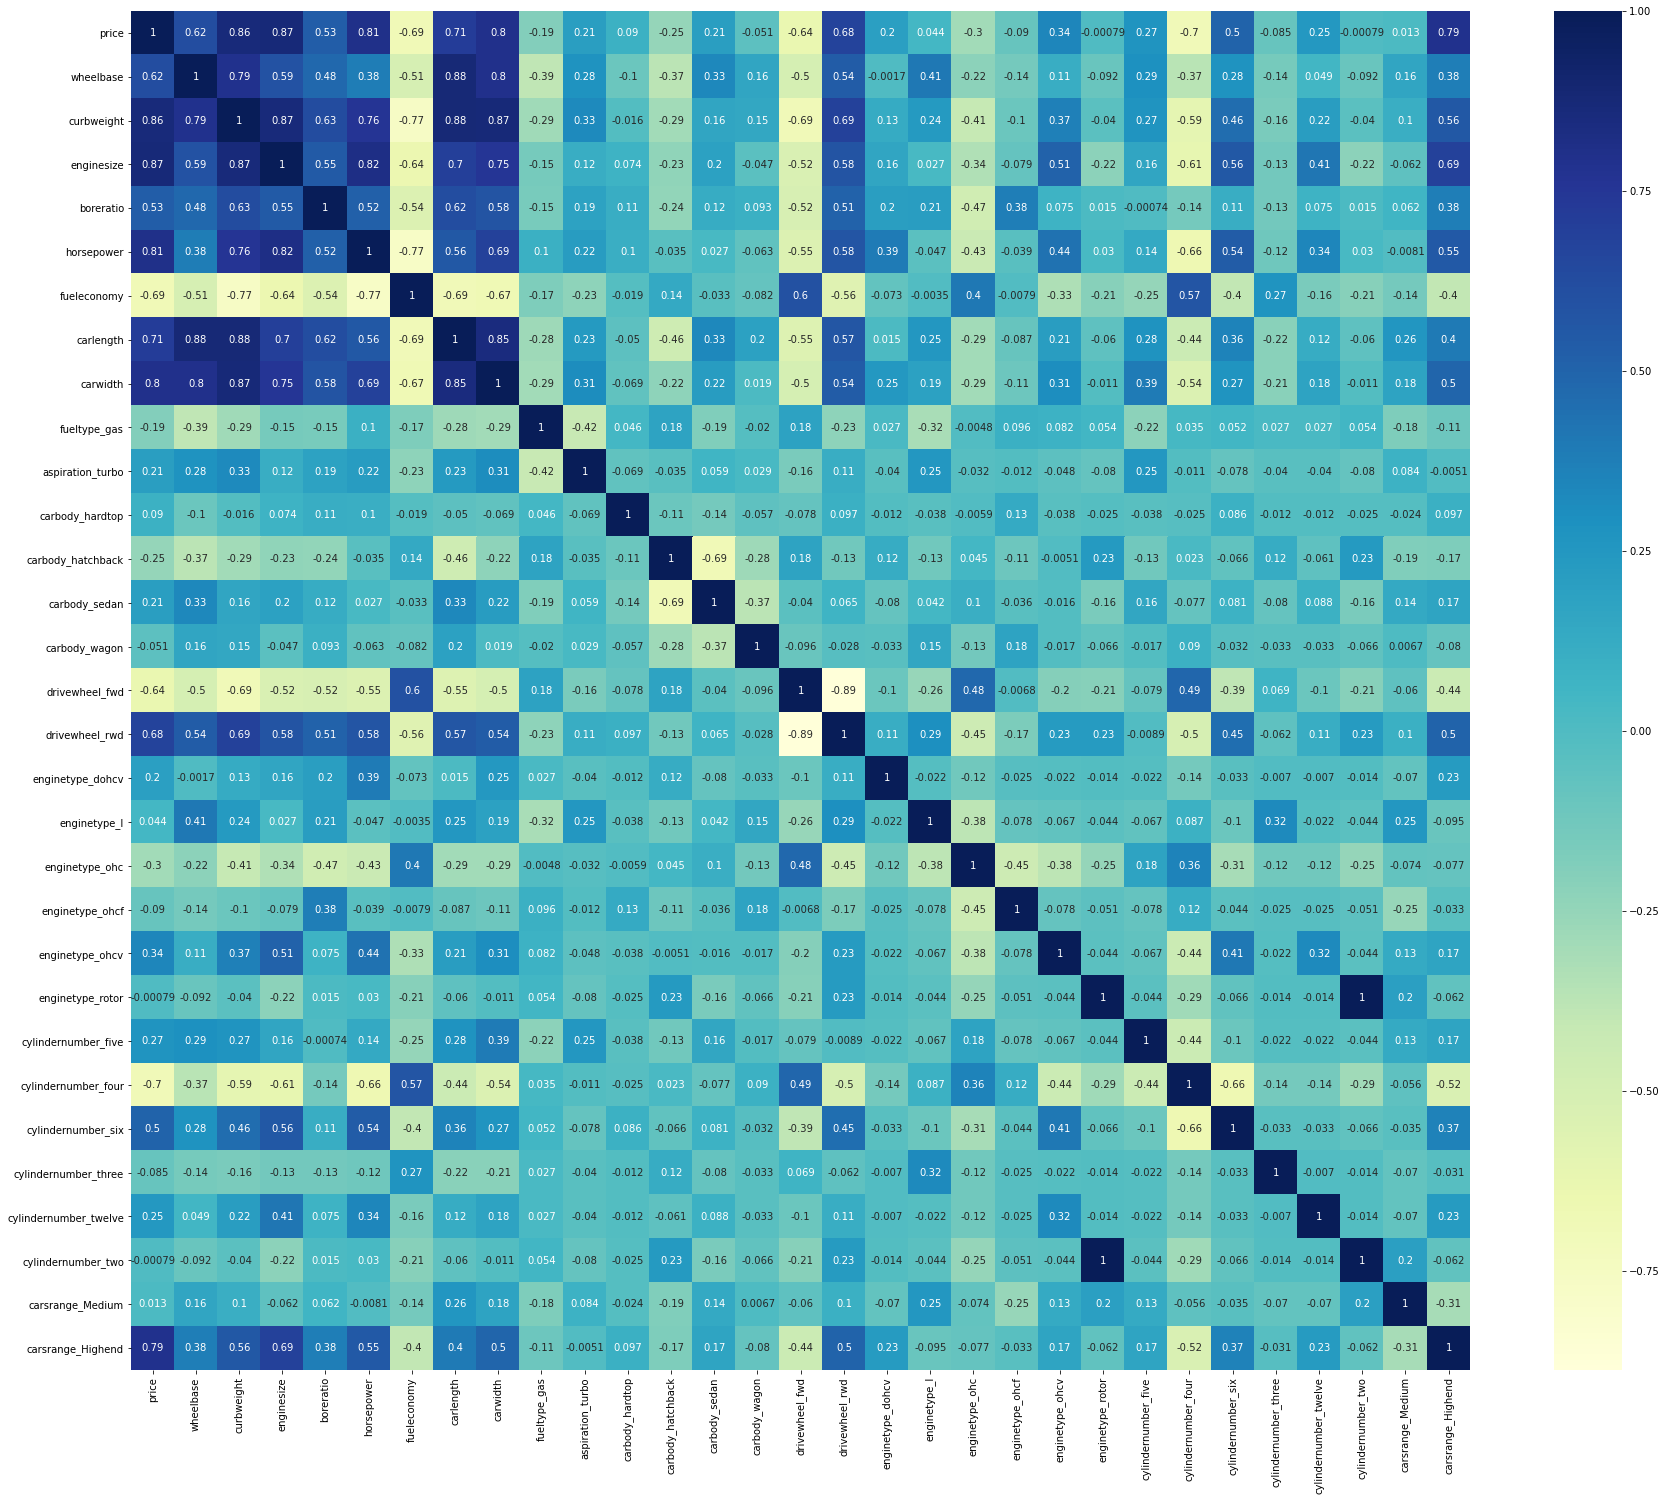

In [82]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.

In [83]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

### Step 8 : Model Building

In [87]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## RFE

https://www.linkedin.com/pulse/what-recursive-feature-elimination-amit-mittal/

https://online.stat.psu.edu/stat462/node/180/

# VIF

https://statisticsbyjim.com/regression/variance-inflation-factors/

https://www.listendata.com/2018/01/linear-regression-in-python.html

In [84]:
X_train.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carsrange_Medium',
       'carsrange_Highend'],
      dtype='object')

In [85]:
len(X_train.columns)

30

In [88]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [89]:
X_train.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carsrange_Medium',
       'carsrange_Highend'],
      dtype='object')

In [90]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [94]:
X_train.loc[:,rfe.support_].columns

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'carsrange_Highend'],
      dtype='object')

In [95]:
rfe.ranking_

array([ 3,  1, 13, 10,  1,  1, 11,  1, 17, 18,  2,  1,  1,  1, 16, 15,  1,
       19,  7,  8,  9, 21,  6,  4,  5, 14,  1, 20, 12,  1])

In [99]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('fueltype_gas', False, 17),
 ('aspiration_turbo', False, 18),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 15),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 19),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 9),
 ('enginetype_rotor', False, 21),
 ('cylindernumber_five', False, 6),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 5),
 ('cylindernumber_three', False, 14),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 20),
 ('carsrange_Medium', False, 12),
 ('carsrange_Highend', True, 1)]

In [100]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'carsrange_Highend'],
      dtype='object')

In [101]:
len(X_train.columns[rfe.support_])

10

#### Building model using statsmodel, for the detailed statistics

In [102]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

curbweight  horsepower  fueleconomy  carwidth  carbody_hatchback  \
122    0.272692    0.083333     0.530864  0.291667                  0   
125    0.500388    0.395833     0.213992  0.666667                  1   
166    0.314973    0.266667     0.344307  0.308333                  1   
1      0.411171    0.262500     0.244170  0.316667                  0   
199    0.647401    0.475000     0.122085  0.575000                  0   

     carbody_sedan  carbody_wagon  enginetype_dohcv  cylindernumber_twelve  \
122              1              0                 0                      0   
125              0              0                 0                      0   
166              0              0                 0                      0   
1                0              0                 0                      0   
199              0              1                 0                      0   

     carsrange_Highend  
122                  0  
125                  1  
166                  0  
1                    0  
199                  0

In [103]:
import statsmodels.api as sm 

In [104]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame() # expty dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [105]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.29e-70
Time:                        08:23:19   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

p-value of `twelve` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [107]:
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

#### MODEL 2

In [108]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 20 May 2022   Prob (F-statistic):           4.25e-71
Time:                        08:30:43   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0764      0.04

In [109]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### MODEL 3

In [110]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Fri, 20 May 2022   Prob (F-statistic):           7.85e-72
Time:                        08:31:45   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0305      0.02

In [111]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

Features    VIF
0              const  26.90
1         curbweight   8.10
5      carbody_sedan   6.07
4  carbody_hatchback   5.63
3           carwidth   5.14
2         horsepower   3.61
6      carbody_wagon   3.58
8  carsrange_Highend   1.63
7   enginetype_dohcv   1.46

dropping `curbweight` because of high VIF value. (shows that curbweight has high multicollinearity.)

In [112]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### MODEL 4


In [113]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 20 May 2022   Prob (F-statistic):           4.70e-70
Time:                        08:38:04   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0319      0.02

In [114]:
checkVIF(X_train_new)

Features    VIF
0              const  26.89
4      carbody_sedan   6.06
3  carbody_hatchback   5.54
5      carbody_wagon   3.47
1         horsepower   2.50
2           carwidth   2.22
7  carsrange_Highend   1.56
6   enginetype_dohcv   1.21

dropping `sedan` because of high VIF value.

In [115]:
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)

#### MODEL 5

In [116]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.68e-69
Time:                        08:39:28   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0934      0.01

In [117]:
checkVIF(X_train_new)

Features    VIF
0              const  10.82
1         horsepower   2.39
2           carwidth   2.09
6  carsrange_Highend   1.55
3  carbody_hatchback   1.23
5   enginetype_dohcv   1.21
4      carbody_wagon   1.11

dropping `wagon` because of high p-value.

In [118]:
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)

#### MODEL 6

In [119]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.57e-70
Time:                        08:40:42   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

In [120]:
checkVIF(X_train_new)

Features    VIF
0              const  10.39
1         horsepower   2.39
2           carwidth   2.08
5  carsrange_Highend   1.53
4   enginetype_dohcv   1.21
3  carbody_hatchback   1.13

### Step 9 : Residual Analysis of Model

In [121]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

In [122]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.57e-70
Time:                        08:43:44   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.018     -5.530      0.000      -0.132      -0.062
horsepower            0.5013      0.051      9.832      0.000       0.401       0.602
carwidth              0.3952      0.043      9.252      0.000       0.311       0.480
carbody_hatchback    -0.0336      0.012     -2.764      0.006      -0.058      -0.010
enginetype_dohcv     -0.3231      0.072     -4.502      0.000      -0.465      -0.181
carsrange_Highend     0.2833      0.021     13.615      0.000       0.242       0.324
==============================================================================
Omnibus:                       36.097   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.717
Skew:                           1.067   Prob(JB):                     8.07e-18
Kurtosis:                       5.943   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Errors')

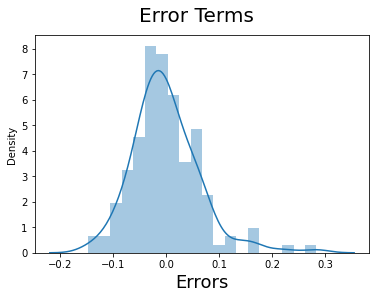

In [123]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Step 10 : Prediction and Evaluation

In [124]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [125]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [126]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [127]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [128]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.814638722635375

Text(0, 0.5, 'y_pred')

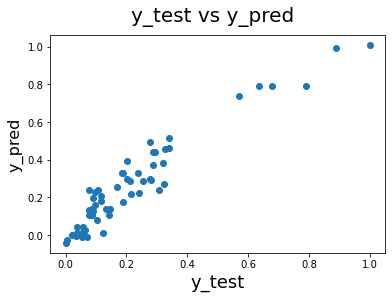

In [129]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [130]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.57e-70
Time:                        08:45:53   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.899 and 0.896 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

In [131]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [132]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## Task for now:

Perform One hot Encoding on categorical columns and MinMax Scaling on numerical cols..